In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sklearn
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

In [15]:
df = pd.read_excel('IFRS9_V.xlsx', sheet_name='Sheet1')  # Replace with your file's name

df

,PRODUCT_TYPE,CUSTOMER_ID,CUSTOMER_NAME,QUALITY_CUSTOMER,STAGE,CUSTOMER_PROFILE,REFRENCE/ ACC,Expiry Date,Sub_limit_code,Sub_limit_type,...,STO,STO GBP,LGD %,Final Expiry date,Final Impairment,DG 12 Months,Financial Statement item,EAD Amount,GP Collateral Type,Colletral amount
0,Loan to Customer,50161420,EGYPTIAN CO.FOR FREEZING&BEEF PROCESSING,SICR,SICR,Local Large Corporate,60006414450,NaN,554.00,S0 - Syndicated Loan - Var.,...,"869,583,000.00","22,833,557.88",0.85,"47,726.00","15,452,831.94",18.00,قروض وتسهيلات العملاء,"36,389,819.70",Unsecured,0.00
1,Loan to Customer,51004700,IFFCO EGYPT S.A.E,Performing,Live,Global Corporate (MNC),60008869778,NaN,516.00,S0 - MTL - VARIABLE INTEREST,...,"7,198,930,000.00","189,029,896.93",0.72,"44,925.00","4,348.26",13.00,قروض وتسهيلات العملاء,"431,688.92",Unsecured,0.00
2,Loan to Customer,51004938,ORIENTAL WEAVERS INTERNATIONAL,Performing,Live,Local Large Corporate,10003418,NaN,547.00,S0 - Documentary Credit Loan,...,"6,321,054,545.45","165,978,595.32",0.72,"45,016.00","111,459.45",12.50,قروض وتسهيلات العملاء,"19,913,040.55",Unsecured,0.00
3,Loan to Customer,51005269,GIZA SPINNING & WEAVING CO,Performing,Live,Local Large Corporate,60006572352,NaN,557.00,S0 - STL REVOLVING INITIATIVE,...,"2,818,030,000.00","73,995,985.58",0.80,"45,061.00","62,479.79",13.00,قروض وتسهيلات العملاء,"5,898,636.22",Unsecured,0.00
4,Loan to Customer,51011228,MINAPHARM PHARMACEUTICALS,Performing,Live,Local Large Corporate,60005018650,NaN,557.00,S0 - STL REVOLVING INTEREST,...,"2,064,266,000.00","54,203,609.32",0.80,"44,651.00","1,648.12",12.50,قروض وتسهيلات العملاء,"283,359.27",Unsecured,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11239,Committed,60133232,ELADEL FOR PLASTIC,Performing,Live,Enterprise (Small Enterprises),NaN,NaN,NaN,G0 - MTL SME Initiative Var.,...,"20,896,000.00","548,688.31",0.28,"45,357.00","131,914.15",19.00,قروض وتسهيلات العملاء,"4,000,000.00",CGC CBE,"2,800,000.00"
11240,CBE Placement / Nostro,50220945,CENTRAL BANK OF EGYPT,Performing,Live,Financial Institution(Banks),201106,NaN,"201,106.00",CBE Placing / Nostro,...,NaN,NaN,0.45,NaN,"16,051,466.01",15.00,قروض وتسهيلات العملاء,"1,585,329,976.40",Unsecured,0.00
11241,Bonds,50220945,CENTRAL BANK OF EGYPT,Performing,Live,Financial Institution(Banks),201106,NaN,"201,106.00",Bonds,...,NaN,NaN,0.45,NaN,"10,372,377.42",15.00,قروض وتسهيلات العملاء,"1,024,432,338.09",Unsecured,0.00
11242,Bills,50220945,CENTRAL BANK OF EGYPT,Performing,Live,Financial Institution(Banks),201106,NaN,"201,106.00",Bonds,...,NaN,NaN,0.45,NaN,"12,995,423.32",15.00,قروض وتسهيلات العملاء,"1,283,498,599.11",Unsecured,0.00


In [16]:
df.dtypes

PRODUCT_TYPE                     object
CUSTOMER_ID                      object
CUSTOMER_NAME                    object
QUALITY_CUSTOMER                 object
STAGE                            object
CUSTOMER_PROFILE                 object
REFRENCE/ ACC                    object
Expiry Date                      object
Sub_limit_code                  float64
Sub_limit_type                   object
BALANCE_CCY                      object
Amortized Balance               float64
Amortized Balance Equivalent    float64
DPD                             float64
LIMIT_NBR                       float64
STO                             float64
STO GBP                         float64
LGD %                           float64
Final Expiry date               float64
Final Impairment                float64
DG 12 Months                    float64
Financial Statement item         object
EAD Amount                      float64
GP Collateral Type               object
Colletral amount                float64


In [17]:
df.describe()

,Sub_limit_code,Amortized Balance,Amortized Balance Equivalent,DPD,LIMIT_NBR,STO,STO GBP,LGD %,Final Expiry date,Final Impairment,DG 12 Months,EAD Amount,Colletral amount
count,"9,564.00","11,244.00","11,244.00","4,777.00","4,875.00","11,241.00","11,241.00","11,244.00","11,103.00","11,244.00","11,244.00","11,244.00","11,244.00"
mean,303.72,"3,292,316.36","5,880,246.75",1.33,"339,251.86","4,024,817,766.13","105,683,884.62",0.57,"33,863.41","62,457.60",14.51,"3,638,080.26","2,148,961.66"
std,"3,563.52","17,052,345.30","36,792,707.41",11.66,"146,100.94","101,597,324,695.75","2,667,748,098.06",0.37,"9,568.14","865,244.00",2.16,"28,185,463.08","23,096,438.70"
min,20.00,0.00,0.00,0.00,6.00,0.00,0.00,0.01,"25,569.00",0.00,1.00,0.00,0.00
25%,102.00,"1,588.01","2,218.19",0.00,"258,152.00","40,820,000.00","1,071,853.79",0.01,"25,569.00",9.86,12.80,"1,806.77",0.00
50%,106.00,"56,225.00","80,602.42",0.00,"386,453.00","135,905,000.00","3,568,600.91",0.77,"25,569.00",120.73,15.00,"43,633.71",0.06
75%,516.00,"828,083.00","1,592,090.27",0.00,"453,153.00","604,566,000.00","15,874,727.03",0.85,"44,924.00","3,404.58",16.00,"663,122.65","63,951.25"
max,"201,106.00","517,907,420.20","1,585,329,976.40",397.00,"515,154.00","5,265,490,909,090.91","138,261,547,733.92",0.97,"47,726.00","60,280,855.08",21.00,"1,585,329,976.40","1,412,939,859.65"


In [18]:
# Check for missing values

df.isnull().sum()  # This code will output the number of missing values in each column.

PRODUCT_TYPE                       0
CUSTOMER_ID                        0
CUSTOMER_NAME                      1
QUALITY_CUSTOMER                   0
STAGE                              0
CUSTOMER_PROFILE                   0
REFRENCE/ ACC                   1681
Expiry Date                     6390
Sub_limit_code                  1680
Sub_limit_type                     0
BALANCE_CCY                        0
Amortized Balance                  0
Amortized Balance Equivalent       0
DPD                             6467
LIMIT_NBR                       6369
STO                                3
STO GBP                            3
LGD %                              0
Final Expiry date                141
Final Impairment                   0
DG 12 Months                       0
Financial Statement item           0
EAD Amount                         0
GP Collateral Type                 0
Colletral amount                   0
dtype: int64

In [19]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

# Loop through each column with missing values

In [20]:
'''
# Create a new Excel writer
with pd.ExcelWriter('missing_values.xlsx') as writer:
    # Loop through each column with missing values
    for col in df.columns[df.isnull().any()]:
        # Clean the column name by replacing invalid characters
        cleaned_col = col.replace("/", "_").replace("\\", "_").replace("?", "_").replace("*", "_").replace("[", "_").replace("]", "_") 

        # Filter the DataFrame to get rows with missing values in the current column
        missing_rows = df[df[col].isnull()]

        # Write the filtered DataFrame to a new sheet in the Excel file
        missing_rows.to_excel(writer, sheet_name=f"Missing_{cleaned_col}", index=False)
'''

'\n# Create a new Excel writer\nwith pd.ExcelWriter(\'missing_values.xlsx\') as writer:\n    # Loop through each column with missing values\n    for col in df.columns[df.isnull().any()]:\n        # Clean the column name by replacing invalid characters\n        cleaned_col = col.replace("/", "_").replace("\\", "_").replace("?", "_").replace("*", "_").replace("[", "_").replace("]", "_") \n\n        # Filter the DataFrame to get rows with missing values in the current column\n        missing_rows = df[df[col].isnull()]\n\n        # Write the filtered DataFrame to a new sheet in the Excel file\n        missing_rows.to_excel(writer, sheet_name=f"Missing_{cleaned_col}", index=False)\n'

In [21]:
df['ECL_Coverage'] = df["Final Impairment"] / df["EAD Amount"]
df

,PRODUCT_TYPE,CUSTOMER_ID,CUSTOMER_NAME,QUALITY_CUSTOMER,STAGE,CUSTOMER_PROFILE,REFRENCE/ ACC,Expiry Date,Sub_limit_code,Sub_limit_type,...,STO GBP,LGD %,Final Expiry date,Final Impairment,DG 12 Months,Financial Statement item,EAD Amount,GP Collateral Type,Colletral amount,ECL_Coverage
0,Loan to Customer,50161420,EGYPTIAN CO.FOR FREEZING&BEEF PROCESSING,SICR,SICR,Local Large Corporate,60006414450,NaN,554.00,S0 - Syndicated Loan - Var.,...,"22,833,557.88",0.85,"47,726.00","15,452,831.94",18.00,قروض وتسهيلات العملاء,"36,389,819.70",Unsecured,0.00,0.42
1,Loan to Customer,51004700,IFFCO EGYPT S.A.E,Performing,Live,Global Corporate (MNC),60008869778,NaN,516.00,S0 - MTL - VARIABLE INTEREST,...,"189,029,896.93",0.72,"44,925.00","4,348.26",13.00,قروض وتسهيلات العملاء,"431,688.92",Unsecured,0.00,0.01
2,Loan to Customer,51004938,ORIENTAL WEAVERS INTERNATIONAL,Performing,Live,Local Large Corporate,10003418,NaN,547.00,S0 - Documentary Credit Loan,...,"165,978,595.32",0.72,"45,016.00","111,459.45",12.50,قروض وتسهيلات العملاء,"19,913,040.55",Unsecured,0.00,0.01
3,Loan to Customer,51005269,GIZA SPINNING & WEAVING CO,Performing,Live,Local Large Corporate,60006572352,NaN,557.00,S0 - STL REVOLVING INITIATIVE,...,"73,995,985.58",0.80,"45,061.00","62,479.79",13.00,قروض وتسهيلات العملاء,"5,898,636.22",Unsecured,0.00,0.01
4,Loan to Customer,51011228,MINAPHARM PHARMACEUTICALS,Performing,Live,Local Large Corporate,60005018650,NaN,557.00,S0 - STL REVOLVING INTEREST,...,"54,203,609.32",0.80,"44,651.00","1,648.12",12.50,قروض وتسهيلات العملاء,"283,359.27",Unsecured,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11239,Committed,60133232,ELADEL FOR PLASTIC,Performing,Live,Enterprise (Small Enterprises),NaN,NaN,NaN,G0 - MTL SME Initiative Var.,...,"548,688.31",0.28,"45,357.00","131,914.15",19.00,قروض وتسهيلات العملاء,"4,000,000.00",CGC CBE,"2,800,000.00",0.03
11240,CBE Placement / Nostro,50220945,CENTRAL BANK OF EGYPT,Performing,Live,Financial Institution(Banks),201106,NaN,"201,106.00",CBE Placing / Nostro,...,NaN,0.45,NaN,"16,051,466.01",15.00,قروض وتسهيلات العملاء,"1,585,329,976.40",Unsecured,0.00,0.01
11241,Bonds,50220945,CENTRAL BANK OF EGYPT,Performing,Live,Financial Institution(Banks),201106,NaN,"201,106.00",Bonds,...,NaN,0.45,NaN,"10,372,377.42",15.00,قروض وتسهيلات العملاء,"1,024,432,338.09",Unsecured,0.00,0.01
11242,Bills,50220945,CENTRAL BANK OF EGYPT,Performing,Live,Financial Institution(Banks),201106,NaN,"201,106.00",Bonds,...,NaN,0.45,NaN,"12,995,423.32",15.00,قروض وتسهيلات العملاء,"1,283,498,599.11",Unsecured,0.00,0.01


# Plot Charter

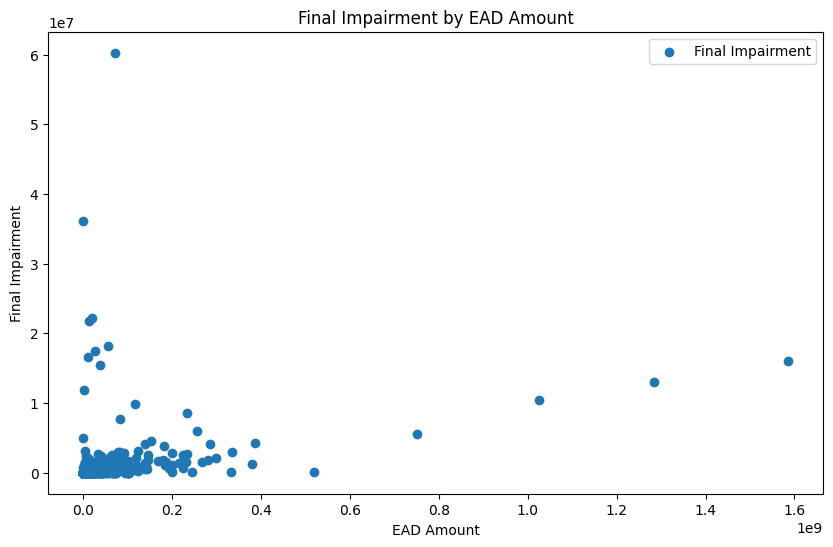

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(df["EAD Amount"], df["Final Impairment"], label="Final Impairment")
#plt.scatter(df["EAD Amount"], df['ECL_Coverage'], label='ECL Coverage')
plt.xlabel('EAD Amount')
plt.ylabel('Final Impairment')
plt.title('Final Impairment by EAD Amount')
plt.legend()
plt.show()

In [24]:
import plotly.graph_objects as go
import nbformat

fig = go.Figure(data=[go.Scatter(
    x=df["EAD Amount"],
    y=df["Final Impairment"],
    mode='markers',
    hoverinfo='text',
    hovertext=[f'EAD Amount: {ead:,.2f}, Final Impairment: {imp:,.2f}' for ead, imp in zip(df["EAD Amount"], df["Final Impairment"])]
)])

fig.update_layout(title='ECL Coverage and Final Impairment by EAD Amount',
                  xaxis_title='EAD Amount',
                  yaxis_title='Final Impairment')
fig.write_html("plotly_plot.html")

fig.show() 

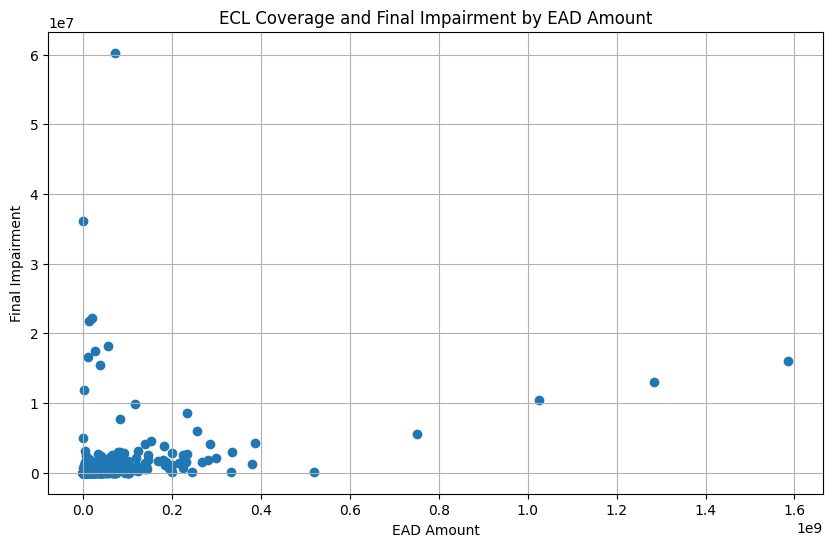

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df["EAD Amount"], df["Final Impairment"])
plt.title("ECL Coverage and Final Impairment by EAD Amount")
plt.xlabel("EAD Amount")
plt.ylabel("Final Impairment")
plt.grid(True)  # Add grid lines (optional)
plt.savefig("matplotlib_plot.png")  # Save as a PNG image
plt.show() #show the plot in the notebook.